### Example demonstration of image alignment using sliced Wasserstein distance

#### Notes:
1) still undergoing a lot of development
2) currently the Image and Transform class requires input array to be image stack

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from scipy import ndimage as ndi

### my library

import utils
import images
import transforms
import distances

In [2]:
image = data.camera()

image_stack = np.array([image, ndi.rotate(image, 180, reshape=False)])  # example images

### precompute
N, ny, nx = image_stack.shape
angles = np.linspace(0, 360, ny, endpoint=False)

### preprocess images
imgs = images.Image(image_stack, normalize=True, mask=True, radius=200, add_noise=False, snr=1).preprocess_images()

### transform images
imgs_pos, imgs_neg = transforms.Transform(imgs, apply_ramp=True).signed_inverse_cdf_transform()

### compute pairwise distances
dists_dict = distances.signed_pairwise_rotational_distances(imgs_pos, imgs_neg, n_points=ny)

### get min distance and rotation
img_idx1, img_idx2 = 0, 1
a_min = angles[np.argmin(dists_dict[(img_idx1, img_idx2)])]

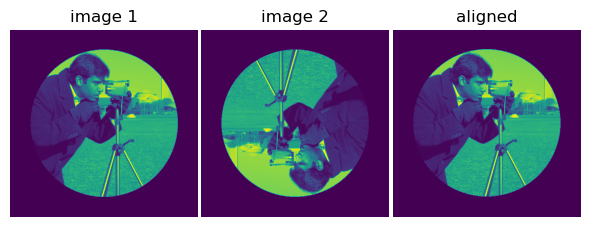

In [3]:
fig, axs = plt.subplots(1,3, figsize=(6,6))
axs = axs.flatten()
axs[0].imshow(imgs[0])
axs[0].set_title('image 1')
axs[0].axis('off')
axs[1].imshow(imgs[1])
axs[1].set_title('image 2')
axs[1].axis('off')
axs[2].imshow(ndi.rotate(imgs[1], -a_min, reshape=False))
axs[2].set_title('aligned')
axs[2].axis('off')
plt.tight_layout(h_pad=0.3, w_pad=0.3)
plt.show()